In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier,export_text
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path=r'C:\Users\quang\OneDrive\Documents\olap\SuperStore_Orders.csv'

In [3]:
df = pd.read_csv(data_path,encoding='latin-1',thousands=',')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01/01/2011,06/01/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01/01/2011,08/01/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01/01/2011,05/01/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01/01/2011,05/01/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01/01/2011,08/01/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [6]:
df.reset_index(names="fact_id", inplace=True)

In [5]:
# # set key is fact_id
# df.set_index('fact_id', inplace= True)

KeyError: "None of ['fact_id'] are in the columns"

## Encode data

In [7]:
df['order_priority'] = df['order_priority'].replace({ 'Low' : 1,'Medium':2,'High':3,'Critical':4})

In [8]:
features=['sales','quantity','discount','profit','order_priority']
target = ['ship_mode']
X = df[features]
y = df[target]

In [9]:
# Chia train test theo tỉ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

c:\Users\quang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [11]:
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy*100,'%')

Accuracy: 56.307272372782215 %


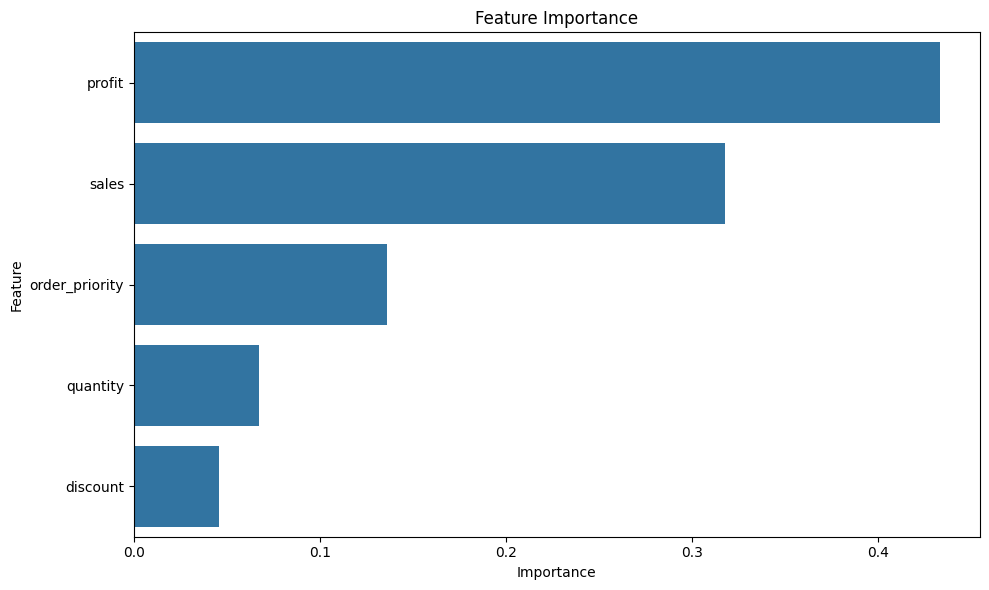

In [12]:
# Get the feature importances
importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance score in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

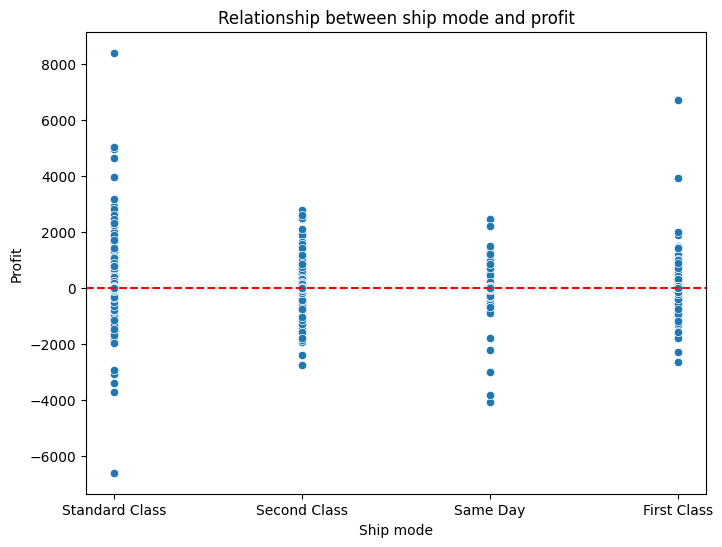

In [13]:
plt.figure(figsize=(8, 6))  # Set the size of the plot (optional)

sns.scatterplot(data=df, x='ship_mode', y='profit')

plt.title('Relationship between ship mode and profit')  # Set the title of the plot (optional)
plt.xlabel('Ship mode')  # Set the label for the x-axis (optional)
plt.ylabel('Profit')  # Set the label for the y-axis (optional)
plt.axhline(0, color='red', linestyle='--')

plt.show()  # Display the plot

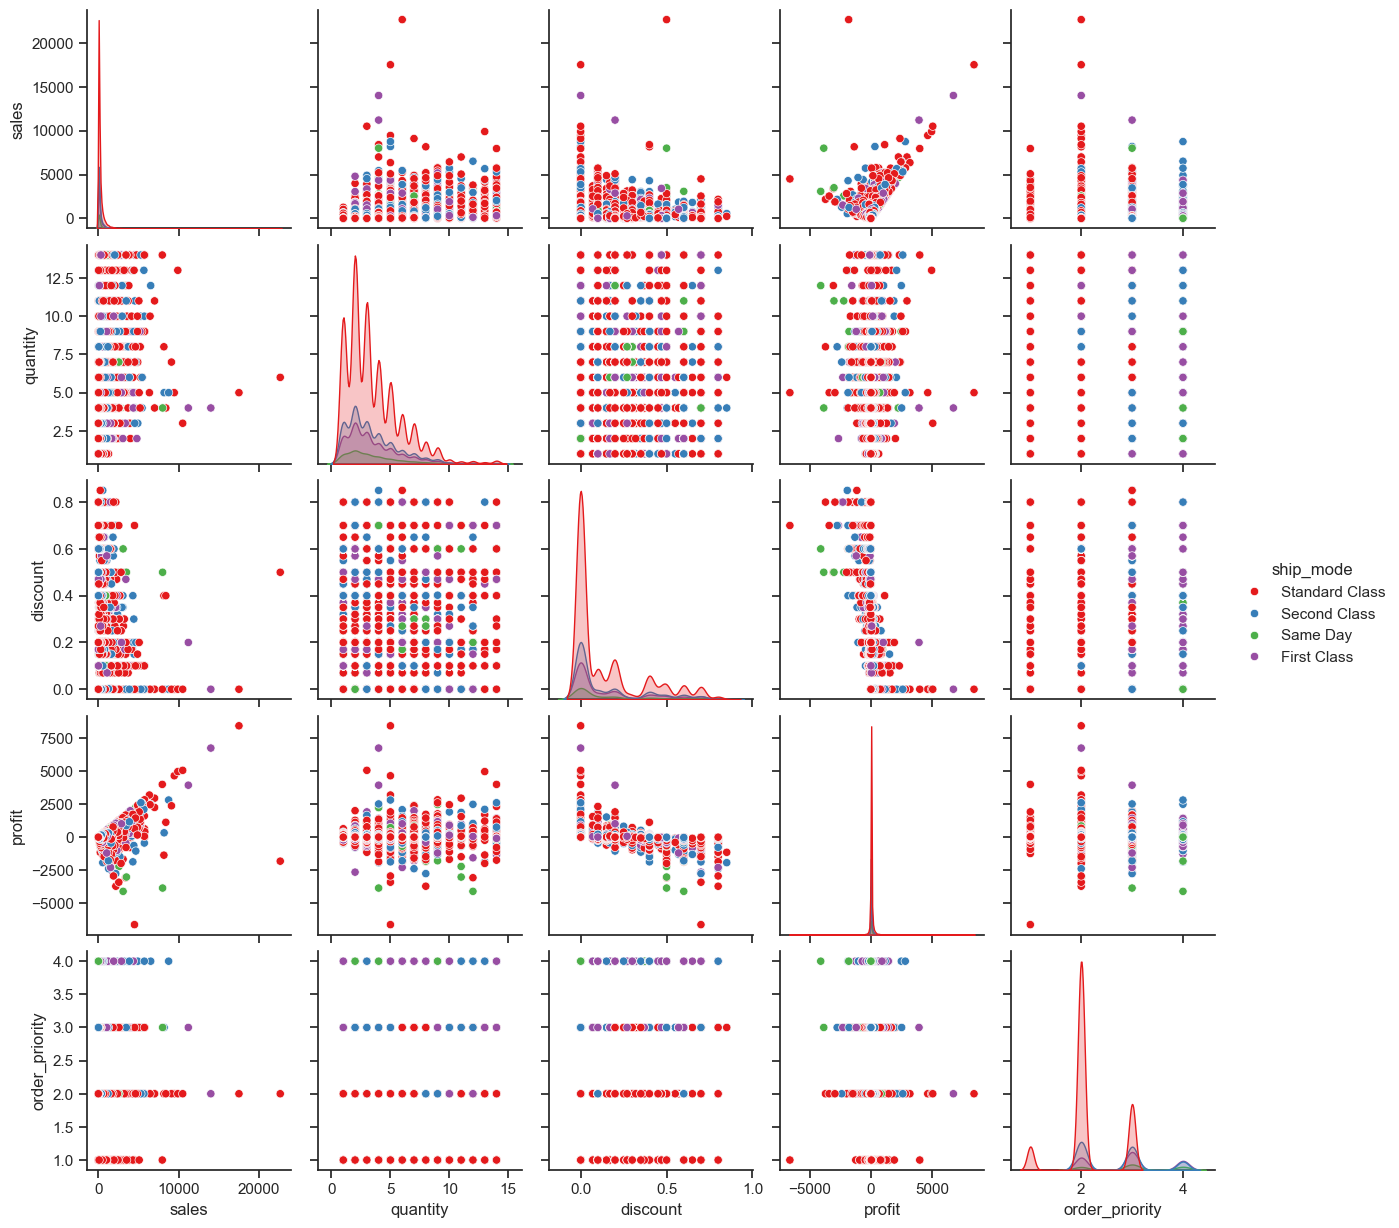

In [14]:
sns.set(style='ticks')

sns.pairplot(df, vars=['sales','quantity','discount','profit','order_priority'], hue='ship_mode', palette='Set1')

plt.show()

In [15]:
dtree_classifier = DecisionTreeClassifier(max_depth = 3)
dtree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
accuracy = dtree_classifier.score(X_test, y_test)
print("Accuracy:", accuracy*100,'%')

Accuracy: 63.82335737960616 %


In [17]:
X_train.columns

Index(['sales', 'quantity', 'discount', 'profit', 'order_priority'], dtype='object')

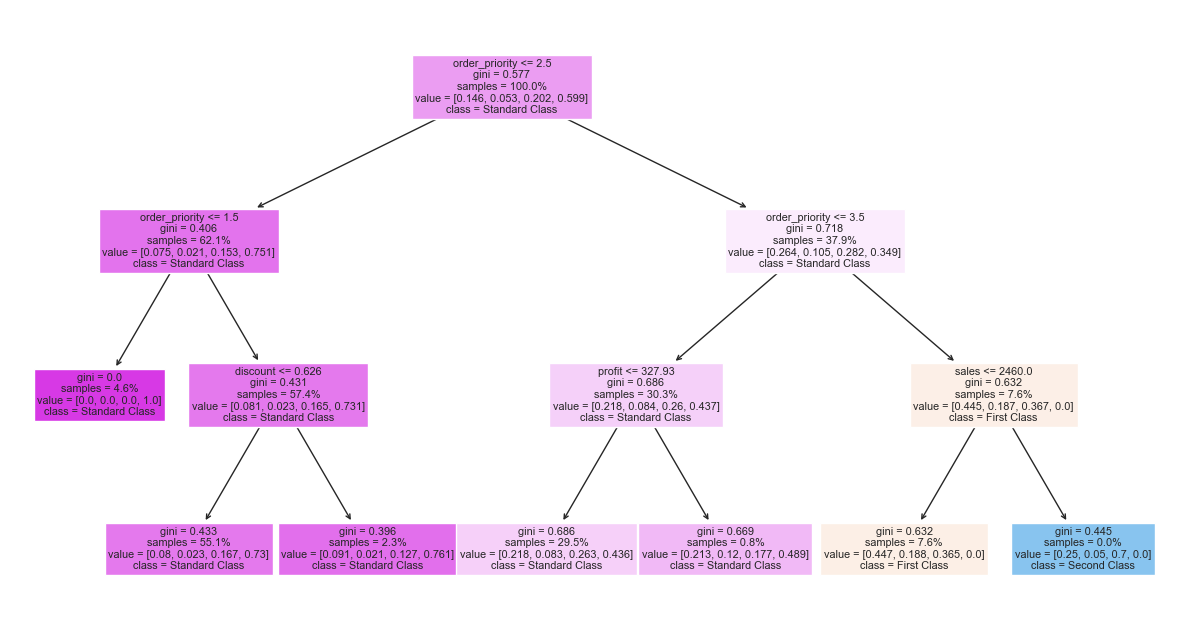

In [18]:

plt.figure(figsize=(15, 8))
plot_tree(dtree_classifier, filled=True, feature_names=X_train.columns, class_names=dtree_classifier.classes_,proportion = True)
plt.show()

In [19]:
# Export the decision tree as text
tree_text = export_text(dtree_classifier, feature_names=features)

# Print the tree text
print(tree_text)

|--- order_priority <= 2.50
|   |--- order_priority <= 1.50
|   |   |--- class: Standard Class
|   |--- order_priority >  1.50
|   |   |--- discount <= 0.63
|   |   |   |--- class: Standard Class
|   |   |--- discount >  0.63
|   |   |   |--- class: Standard Class
|--- order_priority >  2.50
|   |--- order_priority <= 3.50
|   |   |--- profit <= 327.93
|   |   |   |--- class: Standard Class
|   |   |--- profit >  327.93
|   |   |   |--- class: Standard Class
|   |--- order_priority >  3.50
|   |   |--- sales <= 2460.00
|   |   |   |--- class: First Class
|   |   |--- sales >  2460.00
|   |   |   |--- class: Second Class

